In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

In [14]:
df = pd.read_csv("/HospitalAdmissionsData.csv")
df

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda
...,...,...,...,...,...,...,...,...,...,...
58858,42349,12.177083,0,elective,medicare,1,catholic,1,white,zenker's diverticulum/sda
58859,57461,10.613889,0,elective,medicare,1,catholic,0,white,zenker's diverticulum/sda
58860,11800,1.095139,0,emergency,private,0,unobtainable,0,white,zone 2 neck injury
58861,54574,2.925000,0,emergency,medicare,1,not specified,0,black/african american,zoster vs. meningitis


1) Features that exist in this dataset



In [15]:
df.columns

Index(['ID', 'AdmissionLengthDays', 'Death_1', 'Admission_Type',
       'Insurance_Type', 'EnglishLanguage_1', 'Religion_Type', 'Married_1',
       'Race', 'Dx'],
      dtype='object')

2) Float vs Integer Features

In [19]:
#Number of Integer Features
(df.dtypes == int).sum()


4

In [23]:
#Number of Float Features
(df.dtypes == float).sum()

1

3) Object Features

In [25]:
#Features with Object Type
df.columns[df.dtypes == object]

Index(['Admission_Type', 'Insurance_Type', 'Religion_Type', 'Race', 'Dx'], dtype='object')

4) Unique Values of Insurance Type

In [26]:
df['Insurance_Type'].unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

5) Statistic Summary for Admission Length

In [31]:
df['AdmissionLengthDays'].describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [32]:
scipy.stats.describe(df['AdmissionLengthDays'])


DescribeResult(nobs=58863, minmax=(-0.9451388890000001, 294.6604167), mean=10.13897774871043, variance=155.39145743335578, skewness=4.547507703001167, kurtosis=34.91875973033303)

5) What is the most common admission type, insurance type, religion type, race, and diagnosis (Dx)?


In [57]:
#admission type, insurance type, race, and diagnosis (Dx)
df[['Admission_Type', 'Insurance_Type', 'Race', 'Dx']].max()

Admission_Type                     urgent
Insurance_Type                   self pay
Race                      white - russian
Dx                zygomatic fracture left
dtype: object

In [58]:
#Religion type
df['Religion_Type'].value_counts().index[0]

'catholic'

6) Show a histogram for admission days (with appropriate labels, titles, etc), and also show a histogram for admission days on a log scale. Describe what you see.


Text(0, 0.5, '# of Admissions')

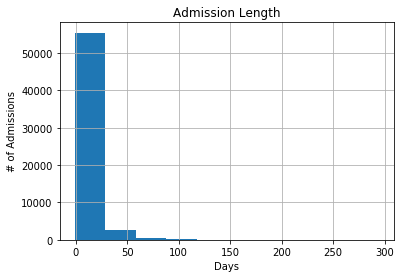

In [66]:
#Admission Days
plot = df['AdmissionLengthDays'].hist()
plot.set_title("Admission Length")
plot.set_xlabel("Days")
plot.set_ylabel("# of Admissions")

Through this diagram, we see that ~90% of patient visits last between 0-25 days. There is a maximum stay duration of 294 days, but there are very few of these cases. In fact, after 125 days, the number of admissions becomes nearly negligible.

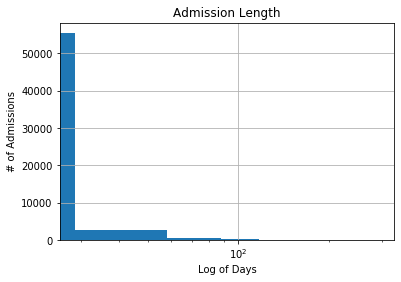

In [72]:
#Log Plot
plot = df['AdmissionLengthDays'].hist()
plot.set_title("Admission Length")
plot.set_xlabel("Log of Days")
plot.set_ylabel("# of Admissions")
plot.set_xscale("log")

Graphing on the log scale provides us a different visualization of the data. As we discoverd in the previous graph, a majority of the patients experience short stays at the hospital. However, using this log scale, we are able to gain further insight to what the frequency of values at the extremes are. We now see that the data is even more strongly centered close to 0


7) Compare the average length of admission between those who died versus those who did not die. Show a visualization, with appropriate labels, titles, etc.


Text(0, 0.5, 'Average Admission Length')

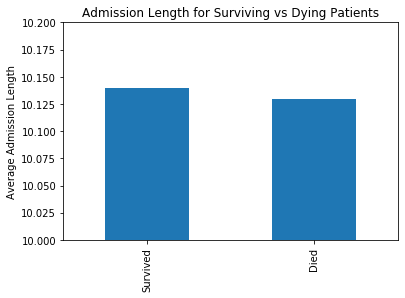

In [99]:
deaths = df.groupby("Death_1")
plot = deaths['AdmissionLengthDays'].mean().plot.bar()
plot.set_title("Admission Length for Surviving vs Dying Patients")
plot.set_xlabel("")
plot.set_xticklabels(["Survived", "Died"])
plot.set_ybound(lower = 10, upper = 10.2)
plot.set_ylabel("Average Admission Length")

8) Describe the association between death and insurance type and show a visualization or test.


Text(0, 0.5, 'Percentage of Patients Experiencing Death')

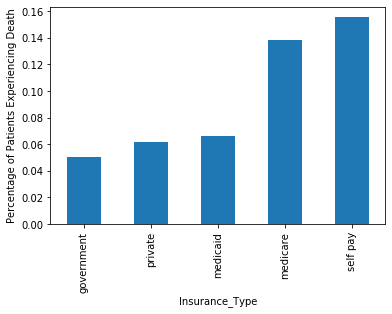

In [115]:
#plot = df['Death_1', "Insurance_Type"].plot()\
insurances = df.groupby("Insurance_Type")
plot = insurances["Death_1"].mean().sort_values().plot.bar()
plot.set_ylabel("Percentage of Patients Experiencing Death")


This Essentially shows the relationship between different types of insurance and the death rate. This shows that people who don't have insurance (for various reasons) have the highest rates of death. I imagine that this is because health care costs and most uninsured patients are likely low income and don't have the money to pay for operations. Secondly, we see higher death rates for medicare. This is probably attributable to the older age of patients with this insurance. It also speaks to the quality of insurance for medicare vs medicaid with both target the same customer demographic. Surprisingly, govenrment insurance seems like it has good coverage. Though it has the lowest death rate, we must be careful about drawing conclusions because these results could be dependent on customer demographic, quality of care, amongst other things. 